In [12]:
import pandas as pd
df = pd.read_csv(r"C:\DC-DC Converter\boost_converter.csv")
df.head()
df.describe()

,Time,Vin,Resistance1,Inductance,Capacitance,Diode_Vf,Vout
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,0.025000,23.995251,21.257811,0.005330,0.000190,7.000000e-01,13.810580
std,0.014434,4.162644,5.637131,0.002201,0.000041,1.307405e-12,1.425573
min,0.000000,10.000703,5.000483,0.000500,0.000050,7.000000e-01,9.198318
25%,0.012500,21.656752,17.523682,0.003589,0.000167,7.000000e-01,12.655589
50%,0.025000,24.432486,21.674919,0.005391,0.000194,7.000000e-01,13.668156
75%,0.037500,27.215437,25.851644,0.007201,0.000222,7.000000e-01,14.961718
max,0.050000,29.999728,29.999920,0.009000,0.000250,7.000000e-01,16.459051


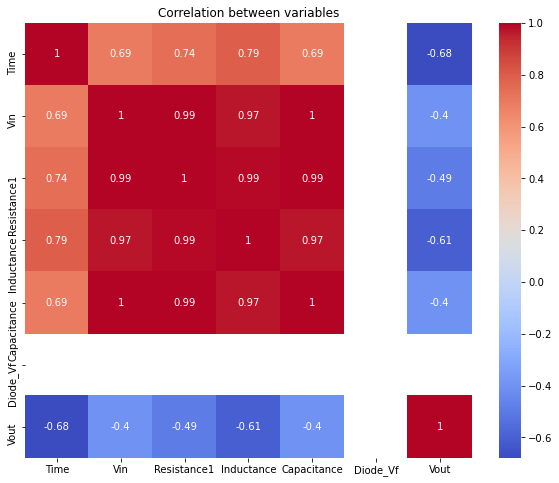

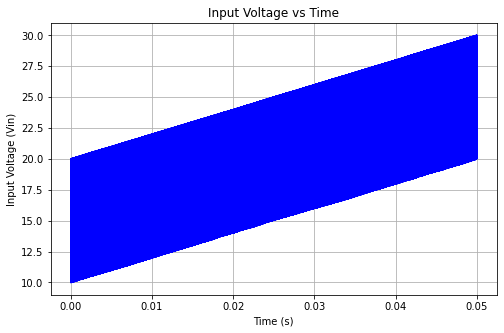

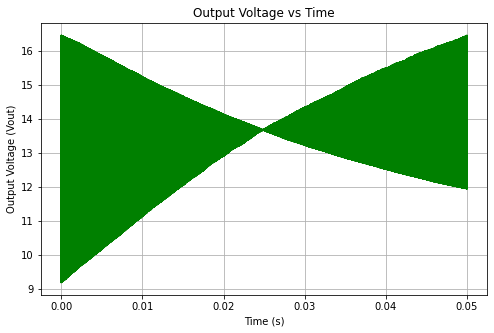

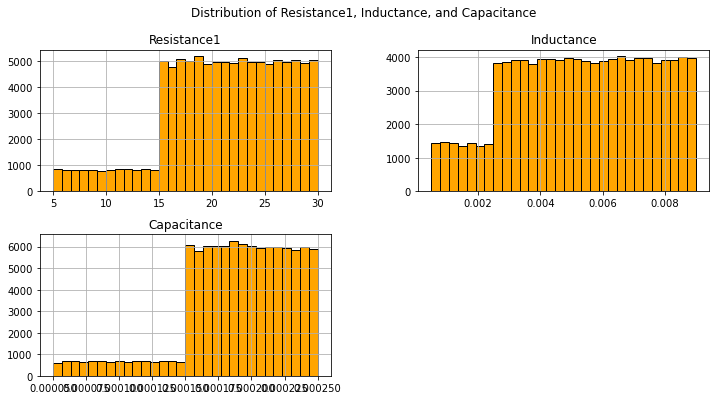

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

# Vin Vs Time
plt.figure(figsize=(8,5))
plt.plot(df['Time'], df['Vin'], color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Input Voltage (Vin)')
plt.title('Input Voltage vs Time')
plt.grid()
plt.show()

# Vout Vs Time
plt.figure(figsize=(8,5))
plt.plot(df['Time'], df['Vout'], color='green')
plt.xlabel('Time (s)')
plt.ylabel('Output Voltage (Vout)')
plt.title('Output Voltage vs Time')
plt.grid()
plt.show()

#  Histograms for RLC
df[['Resistance1', 'Inductance', 'Capacitance']].hist(bins=30, figsize=(12,6), color='orange', edgecolor='black')
plt.suptitle('Distribution of Resistance1, Inductance, and Capacitance')
plt.show()

           Time        Vin  Resistance1  Inductance  Capacitance  Diode_Vf  \
0  0.000000e+00  10.000703     5.000483      0.0005      0.00005       0.7   
1  0.000000e+00  20.000110    15.000163      0.0025      0.00015       0.7   
2  5.555617e-07  20.000357    15.000331      0.0025      0.00015       0.7   
3  1.111123e-06  20.000373    15.000490      0.0025      0.00015       0.7   
4  1.666685e-06  20.000483    15.001822      0.0025      0.00015       0.7   

        Vout  Vin_rolling_mean  Vout_rolling_mean  Vin_rolling_std  \
0   9.198318               NaN                NaN              NaN   
1  16.458792               NaN                NaN              NaN   
2  16.459051               NaN                NaN              NaN   
3  16.458834               NaN                NaN              NaN   
4  16.458705               NaN                NaN              NaN   

   Vout_rolling_std  Vin_rate_of_change  Vout_rate_of_change  Vin_lag_1  \
0               NaN                

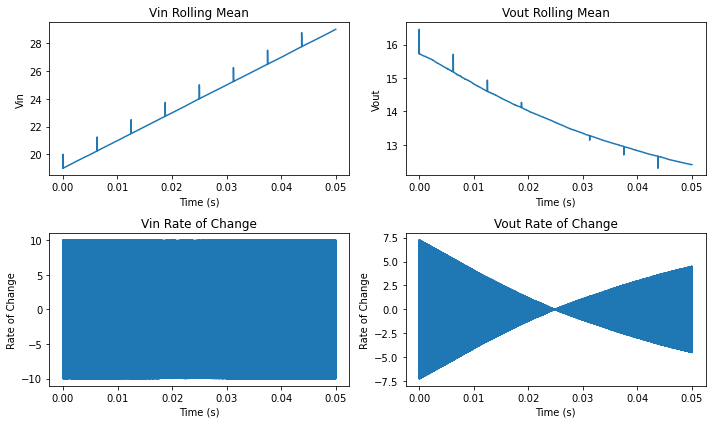

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  Rolling Stat
df['Vin_rolling_mean'] = df['Vin'].rolling(window=10).mean() 
df['Vout_rolling_mean'] = df['Vout'].rolling(window=10).mean()  
df['Vin_rolling_std'] = df['Vin'].rolling(window=10).std() 
df['Vout_rolling_std'] = df['Vout'].rolling(window=10).std() 

# Rate of Change
df['Vin_rate_of_change'] = df['Vin'].diff()  
df['Vout_rate_of_change'] = df['Vout'].diff()  

# Lag Features 
df['Vin_lag_1'] = df['Vin'].shift(1) 
df['Vout_lag_1'] = df['Vout'].shift(1)  

# Interaction Features
df['Vin_x_Inductance'] = df['Vin'] * df['Inductance']  
df['Vout_x_Resistance'] = df['Vout'] * df['Resistance1'] 

# Dimensionality Reduction with PCA
pca = PCA(n_components=2) 
pca_components = pca.fit_transform(df[['Vin', 'Resistance1', 'Inductance', 'Capacitance']])

# Add the PCA components as new features
df['PCA_1'] = pca_components[:, 0]
df['PCA_2'] = pca_components[:, 1]

# Preview the transformed dataframe with new features
print(df.head())

# Visualize the first few features to ensure the transformations
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(df['Time'], df['Vin_rolling_mean'], label='Vin Rolling Mean')
plt.title('Vin Rolling Mean')
plt.xlabel('Time (s)')
plt.ylabel('Vin')

plt.subplot(2, 2, 2)
plt.plot(df['Time'], df['Vout_rolling_mean'], label='Vout Rolling Mean')
plt.title('Vout Rolling Mean')
plt.xlabel('Time (s)')
plt.ylabel('Vout')

plt.subplot(2, 2, 3)
plt.plot(df['Time'], df['Vin_rate_of_change'], label='Vin Rate of Change')
plt.title('Vin Rate of Change')
plt.xlabel('Time (s)')
plt.ylabel('Rate of Change')

plt.subplot(2, 2, 4)
plt.plot(df['Time'], df['Vout_rate_of_change'], label='Vout Rate of Change')
plt.title('Vout Rate of Change')
plt.xlabel('Time (s)')
plt.ylabel('Rate of Change')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Vin','Vout']]  
y = df[['Resistance1', 'Inductance', 'Capacitance']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = RandomForestRegressor(random_state=42)
multi_output_model = MultiOutputRegressor(base_model)
multi_output_model.fit(X_train, y_train)

y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

# actual vs predicted
comparison = pd.DataFrame({'Actual_Resistance1': y_test['Resistance1'].values,
                           'Predicted_Resistance1': y_pred[:, 0],
                           'Actual_Inductance': y_test['Inductance'].values,
                           'Predicted_Inductance': y_pred[:, 1],
                           'Actual_Capacitance': y_test['Capacitance'].values,
                           'Predicted_Capacitance': y_pred[:, 2]})

print(comparison.head())


Mean Squared Error (MSE): 1.0438622838102063e-07
R-squared (R²) Score: 0.9999999902155866
   Actual_Resistance1  Predicted_Resistance1  Actual_Inductance  \
0           26.377110              26.377249           0.007426   
1           27.030958              27.031181           0.007712   
2           17.998282              17.998305           0.003799   
3           26.525618              26.525564           0.007485   
4           28.957430              28.957438           0.008554   

   Predicted_Inductance  Actual_Capacitance  Predicted_Capacitance  
0              0.007426            0.000225               0.000225  
1              0.007712            0.000230               0.000230  
2              0.003799            0.000170               0.000170  
3              0.007485            0.000226               0.000226  
4              0.008554            0.000243               0.000243  


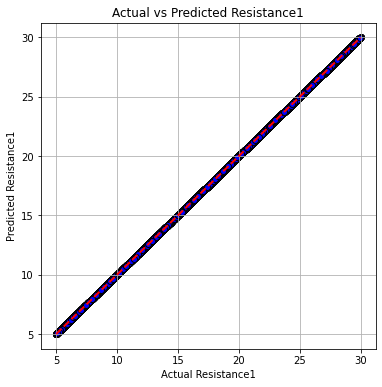

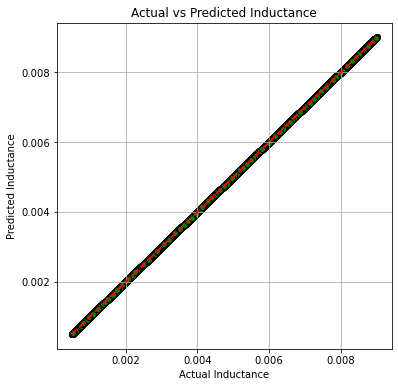

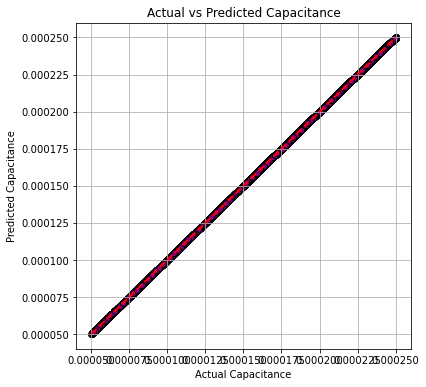

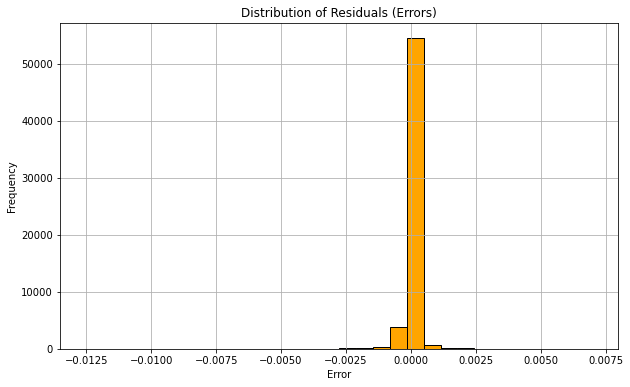

In [16]:
#  Plot Actual vs Predicted (R)
plt.figure(figsize=(6,6))
plt.scatter(y_test['Resistance1'], y_pred[:,0], color='blue', edgecolor='k')
plt.plot([y_test['Resistance1'].min(), y_test['Resistance1'].max()],
         [y_test['Resistance1'].min(), y_test['Resistance1'].max()],
         'r--', lw=2)
plt.xlabel('Actual Resistance1')
plt.ylabel('Predicted Resistance1')
plt.title('Actual vs Predicted Resistance1')
plt.grid()
plt.show()

# Plot Actual vs Predicted (L)
plt.figure(figsize=(6,6))
plt.scatter(y_test['Inductance'], y_pred[:,1], color='green', edgecolor='k')
plt.plot([y_test['Inductance'].min(), y_test['Inductance'].max()],
         [y_test['Inductance'].min(), y_test['Inductance'].max()],
         'r--', lw=2)
plt.xlabel('Actual Inductance')
plt.ylabel('Predicted Inductance')
plt.title('Actual vs Predicted Inductance')
plt.grid()
plt.show()

# Actual vs Predicted (C)
plt.figure(figsize=(6,6))
plt.scatter(y_test['Capacitance'], y_pred[:,2], color='purple', edgecolor='k')
plt.plot([y_test['Capacitance'].min(), y_test['Capacitance'].max()],
         [y_test['Capacitance'].min(), y_test['Capacitance'].max()],
         'r--', lw=2)
plt.xlabel('Actual Capacitance')
plt.ylabel('Predicted Capacitance')
plt.title('Actual vs Predicted Capacitance')
plt.grid()
plt.show()

residuals = y_test.values - y_pred

plt.figure(figsize=(10,6))
plt.hist(residuals.flatten(), bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Vin', 'Vout']]
y = df[['Resistance1', 'Inductance', 'Capacitance']]

model = LinearRegression()
model.fit(X, y)

def recommend_components(vin_value, vout_value):
    new_input = pd.DataFrame({'Vin': [vin_value], 'Vout': [vout_value]})
    prediction = model.predict(new_input)
    print(f"Recommended Resistance1: {prediction[0][0]:.6f} ohms")
    print(f"Recommended Inductance: {prediction[0][1]:.6f} H")
    print(f"Recommended Capacitance: {prediction[0][2]:.6f} F")


recommend_components(18, 14)



Recommended Resistance1: 13.464143 ohms
Recommended Inductance: 0.002509 H
Recommended Capacitance: 0.000130 F


In [22]:
recommend_components(14.67,19)

Recommended Resistance1: 6.938240 ohms
Recommended Inductance: -0.001043 H
Recommended Capacitance: 0.000097 F
